In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '1980_onwards.csv'
data = pd.read_csv(file_path)

data.head()

,Year,Crop production,Livestock,Forestry,Fishing,Construction Sector Naira(million),Information and Communication Sector (millions in naira),Real Estate (millions of naira),Account_Balance Billions of USD,"Exports of goods, fob BoP(cur. US $)",Population,"Manufacturing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Lending interest rate (%)
0,1980,1854764.44,341411.50,77897.99,90299.23,851561.61,263409.45,1063959.81,5.178,25956311740,73424000,20.263709,12.240409,39.245090,8.431667
1,1981,1854764.44,341411.50,77897.99,90299.23,851561.61,263409.45,1063959.81,-6.474,17811400000,75441000,20.263709,12.240409,39.245090,8.916667
2,1982,1897078.85,361115.70,73910.25,93856.08,679200.42,281235.38,1074049.33,-7.282,12337840000,77428000,20.332251,13.502690,34.809208,9.537500
3,1983,1842704.31,393131.01,75282.78,97963.82,598782.27,278786.50,1086703.98,-4.332,10370124892,79415000,21.098253,14.990733,34.118441,9.976667
4,1984,1759115.15,399685.38,76694.14,68010.74,488143.29,253756.74,1086931.99,123.000,12005730000,81449000,17.736358,18.308361,30.345920,10.241667


In [6]:
# Display the number of rows and columns
print("Shape of the dataframe:", data.shape)

# Display column names
print("Columns in the dataframe:", data.columns)

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Shape of the dataframe: (44, 15)
Columns in the dataframe: Index(['Year', 'Crop production', 'Livestock', 'Forestry', 'Fishing',
       'Construction Sector Naira(million)',
       'Information and Communication Sector (millions in naira)',
       'Real Estate (millions of naira)', 'Account_Balance Billions of USD',
       'Exports of goods, fob BoP(cur. US $)', 'Population',
       'Manufacturing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Lending interest rate (%)'],
      dtype='object')
Missing values in each column:
Year                                                          0
Crop production                                               0
Livestock                                                     0
Forestry                                                      0
Fishing                                                       0
Construction Sector Naira(

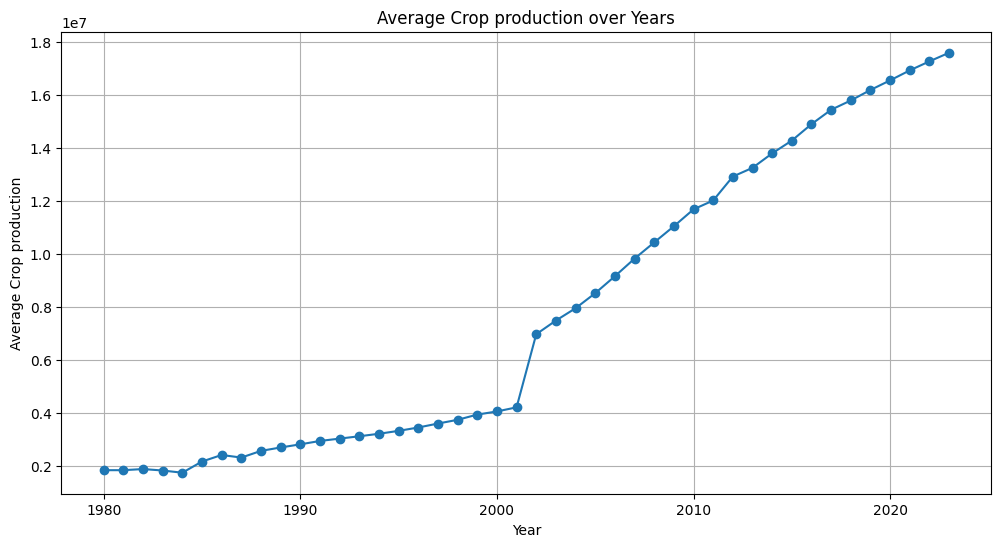

In [7]:
# Time series analysis of Crop production over Years
yearly_avg = data.groupby('Year')['Crop production'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Crop production over Years')
plt.xlabel('Year')
plt.ylabel('Average Crop production')
plt.grid(True)
plt.show()

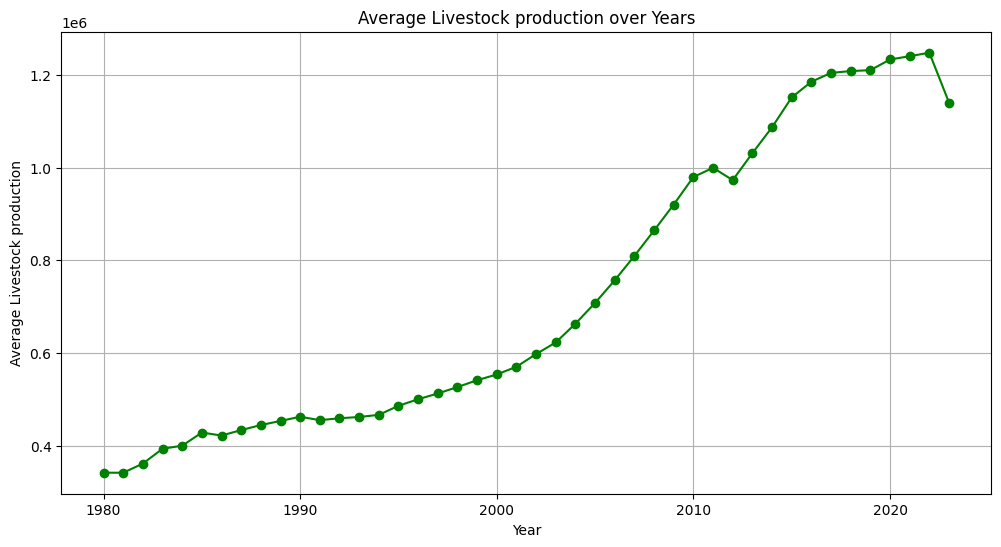

In [8]:
# Time series analysis of Livestock production over Years
yearly_avg_livestock = data.groupby('Year')['Livestock'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_livestock.index, yearly_avg_livestock.values, marker='o', color='green')
plt.title('Average Livestock production over Years')
plt.xlabel('Year')
plt.ylabel('Average Livestock production')
plt.grid(True)
plt.show()

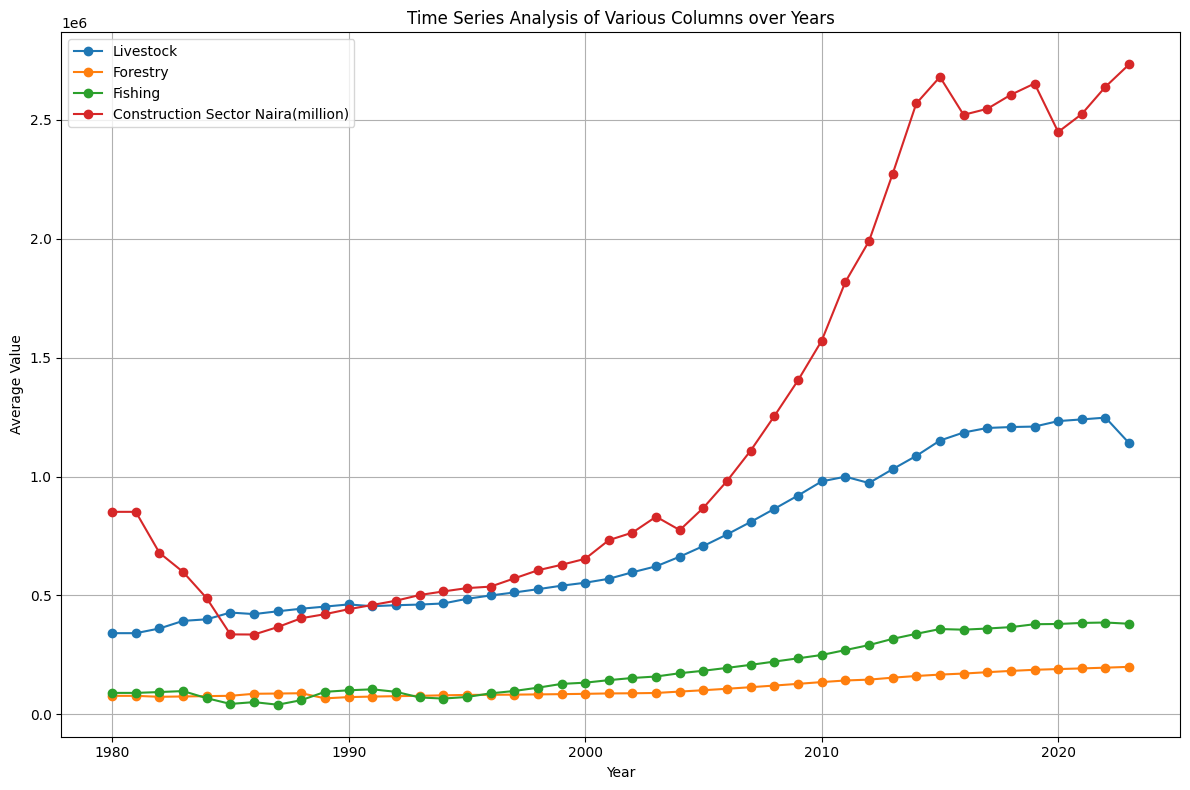

In [9]:
# List of columns to analyze
columns_to_analyze = ['Livestock', 'Forestry', 'Fishing', 'Construction Sector Naira(million)']

# Plotting time series analysis for each column
plt.figure(figsize=(12, 8))

for column in columns_to_analyze:
    # Calculate yearly average for the column
    yearly_avg = data.groupby('Year')[column].mean()
    
    # Plotting
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=column)

# Customize plot
plt.title('Time Series Analysis of Various Columns over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Number of outliers detected: 0


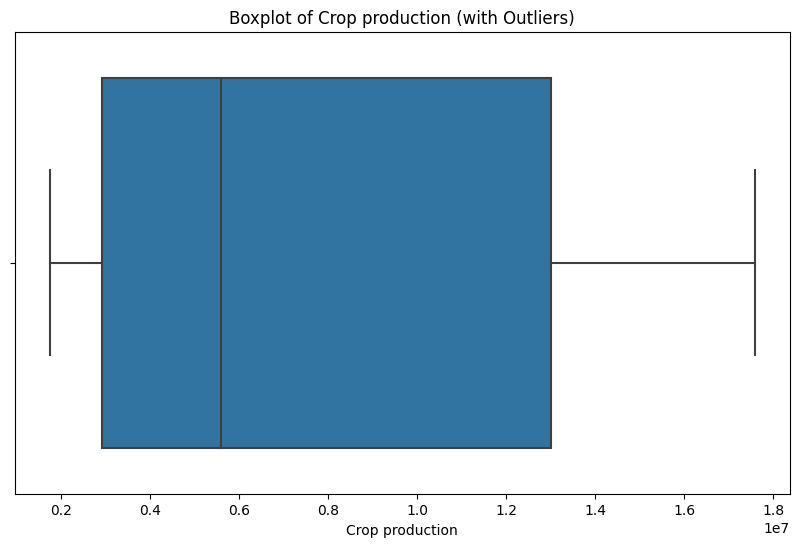

In [10]:
# Outlier detection and treatment for Crop production using IQR

# Calculate quartiles
Q1 = data['Crop production'].quantile(0.25)
Q3 = data['Crop production'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = data[(data['Crop production'] < lower_bound) | (data['Crop production'] > upper_bound)]
clean_df = data[(data['Crop production'] >= lower_bound) & (data['Crop production'] <= upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")

# Optionally, visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Crop production', data=data)
plt.title('Boxplot of Crop production (with Outliers)')
plt.xlabel('Crop production')
plt.show()

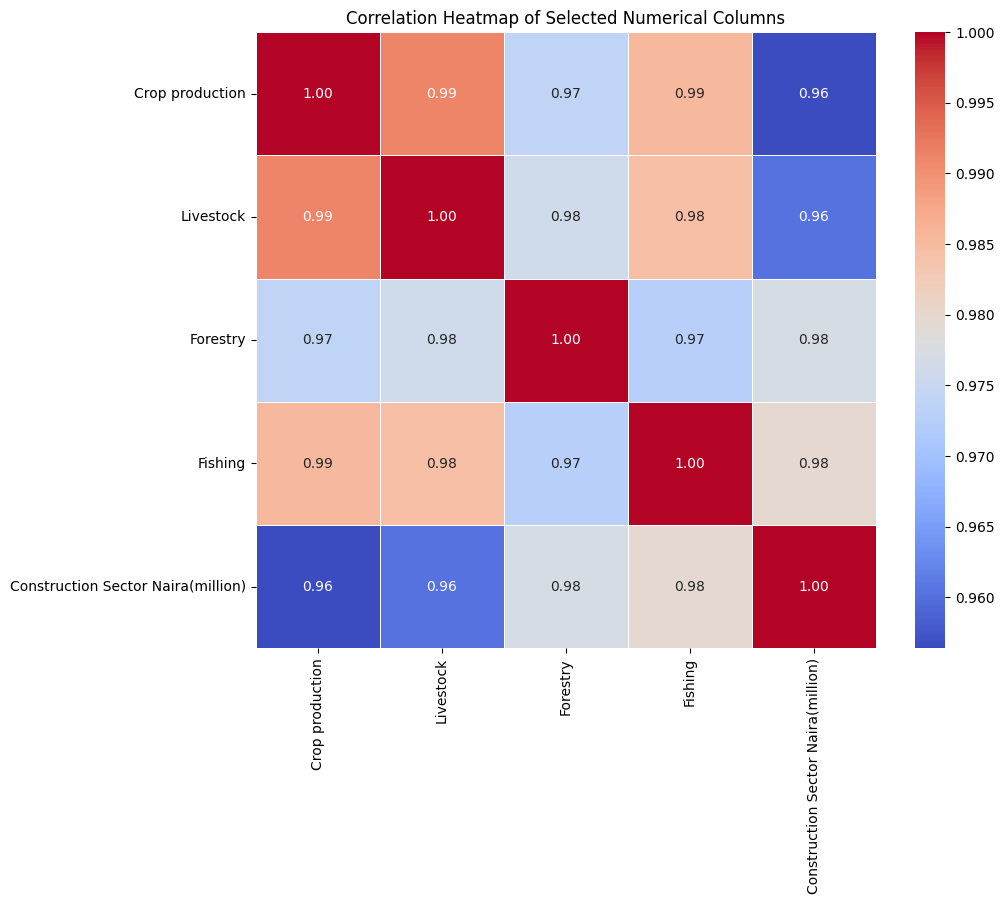

In [11]:
columns = ['Crop production', 'Livestock', 'Forestry', 'Fishing', 'Construction Sector Naira(million)']
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()